In [1]:
import json
import pandas as pd
import hdbscan
import numpy as np
from TFTClusterer import TFTClusterer
from datetime import datetime, timedelta
from googledrivesave import trashfolder, outputtodrive
import pygsheets
from SQLGatherer import loaddb
from matplotlib import pyplot as plt

def main():
    #Grab Data
    df = loaddb(hours=24)
    gameversion = df['game_version'].max()

    df=df.loc[df['game_version']==gameversion]

    assert len(df) >= 100, "less than 100 matches in newest patch"

    #Cluster Data
    clusterclass=TFTClusterer(df)
    #clusterclass.imputetraits()
    clusterclass.cluster(divisor=25, cluster_selection_epsilon=0)

    #Output cluster figure
    clusterclass.plot.figure.savefig('fig.png')
    pd.DataFrame(clusterclass.clusterdf.groupby('hdbnumber')['hdb'].value_counts()).to_csv('hdbnumber.csv')
    print(sum(clusterclass.clusterdf['hdbnumber']==0)/len(clusterclass.clusterdf))

    #output Files for Power BI
    clusterclass.unitshdb.to_csv("unitshdb.csv",index=False)
    clusterclass.itemshdb.to_csv("itemshdb.csv",index=False)
    clusterclass.clusterdf[["comp_id","participants.placement","hdb","game_variation"]].to_csv("hdb.csv",index=False)

    #Write newest date
    f = open('newestdate.csv','w')
    f.write(str(datetime.fromtimestamp(df['game_datetime'].max()/1e3))) #Give your csv text here.
    f.close()

    clusterclass.reduce_dimension_graph()
    clusterclass.eval_clustering()

    #Output files to drive for deracher
    allhdbdf = clusterclass.allhdbdf()

    variationname = 'AllGalaxies'
    trashfolder()

    outputtodrive(allhdbdf.sort_index(),variationname)

    outputtodrive(pd.DataFrame(data={'last_datetime': [df['game_datetime'].max()]}),'last_datetime')
    outputtodrive(pd.DataFrame(df['game_variation'].value_counts()),'gamevariationcounts')


HDB Scan
0.17387387387387387


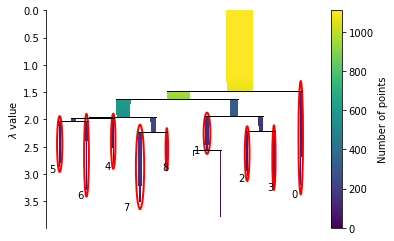

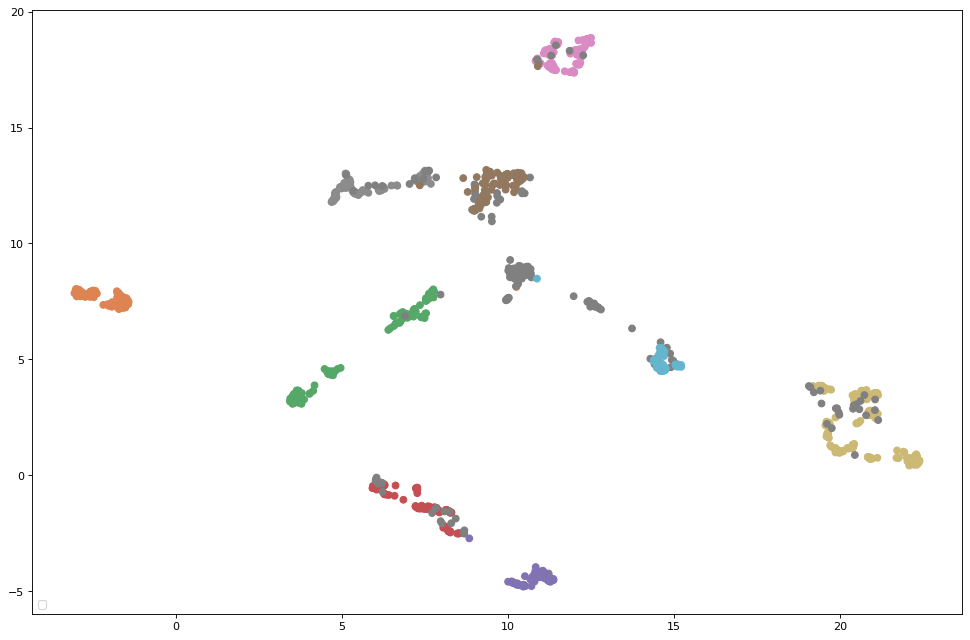

In [2]:
main()